In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [9]:
from CVAE import *
from helper import OHE

In [16]:
### SETTING OF MODEL/TRAINING PARAMETERS

layer_structure = [784, 300, 50, 10, 2]

# we flatten the MNIST images
input_dim = 784 

# we perform OHE on the numbers
conditional_vector_dim = 10 

# minibatch size for training
minibatch_size = 256

# no. of epochs for training
n_iter = 15

In [17]:
### DEFINE DATALOADER

train_loader = torch.utils.data.DataLoader(
torchvision.datasets.MNIST('./data/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                (0.1307,), (0.3081,))
                             ])),
batch_size=minibatch_size, shuffle=True)



In [18]:
model = CVAE(torch.tensor(layer_structure), input_dim, conditional_vector_dim)
model.initialise_model()
model.train(n_iter = n_iter, train_loader=train_loader)

In [33]:
# generate and visualise samples

examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)

conditional_vector = torch.tensor(OHE(example_targets.numpy()))
conditional_vector = conditional_vector.type(torch.float)


samples = model.generate_samples(torch.tensor(conditional_vector))
samples = samples.reshape((minibatch_size, 28, 28))


/var/folders/n5/t72v72dd767fqh385sx1j7mm0000gn/T/ipykernel_27831/3400570384.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  samples = model.generate_samples(torch.tensor(conditional_vector))


tensor(1)


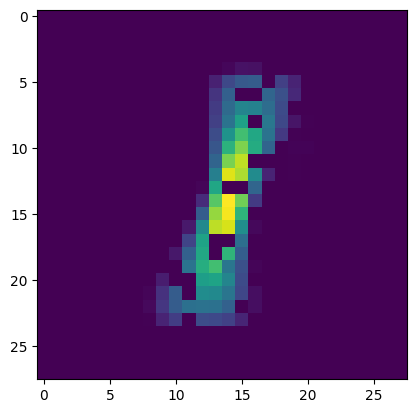

---
tensor(2)


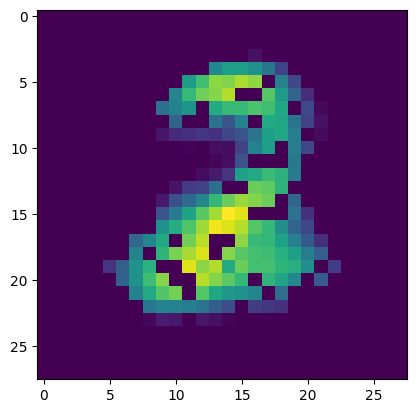

---
tensor(6)


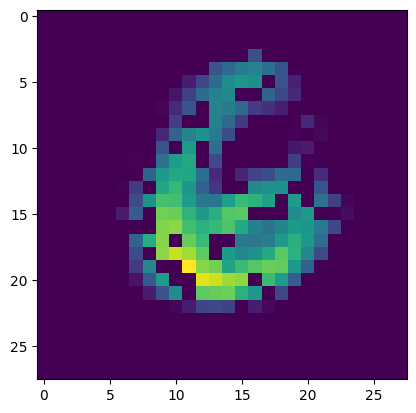

---
tensor(4)


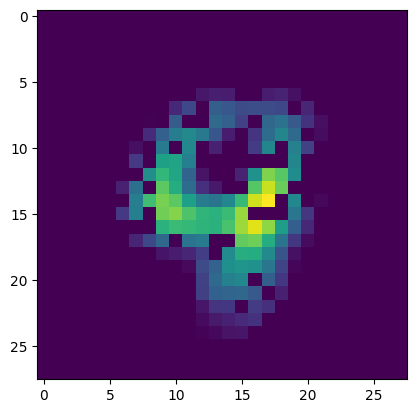

---
tensor(5)


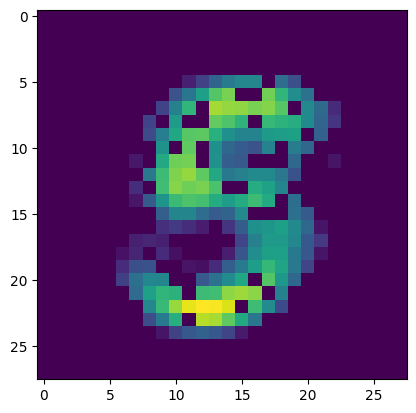

---
tensor(9)


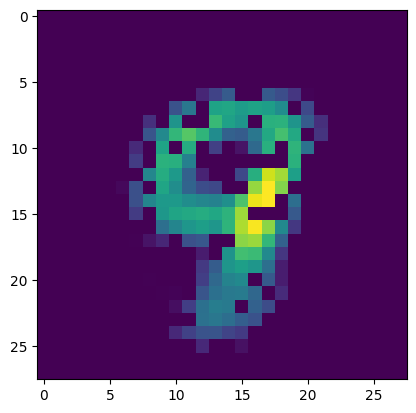

---
tensor(8)


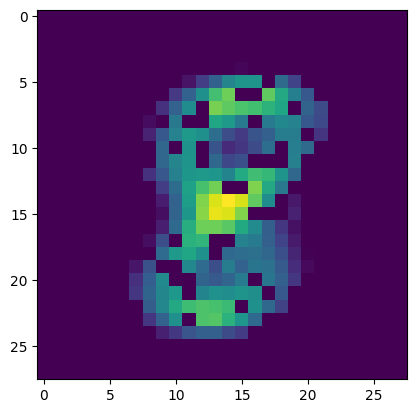

---
tensor(2)


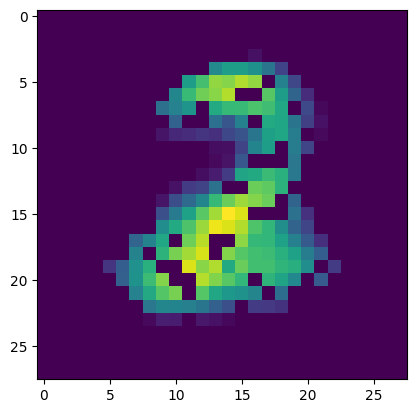

---
tensor(6)


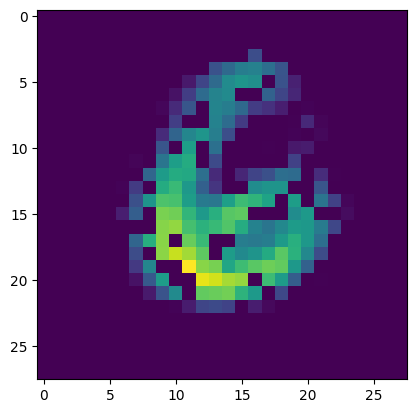

---
tensor(7)


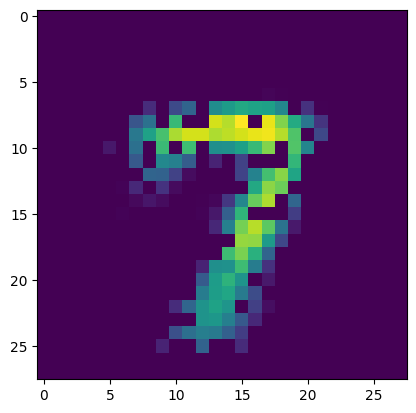

---
tensor(2)


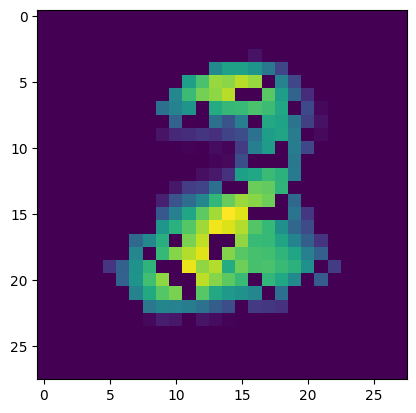

---
tensor(1)


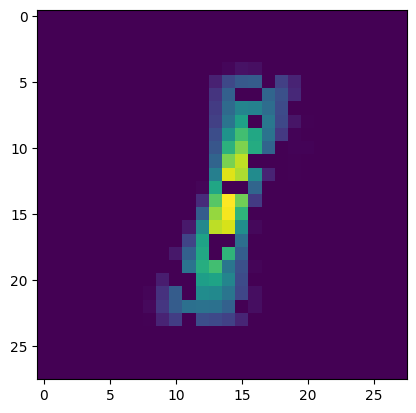

---
tensor(7)


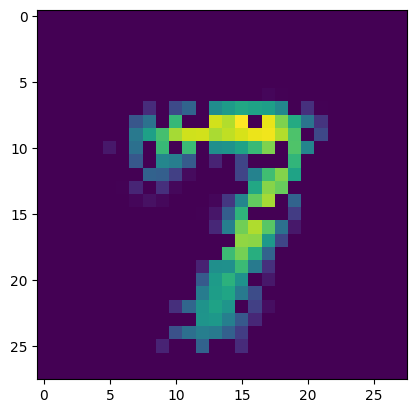

---
tensor(2)


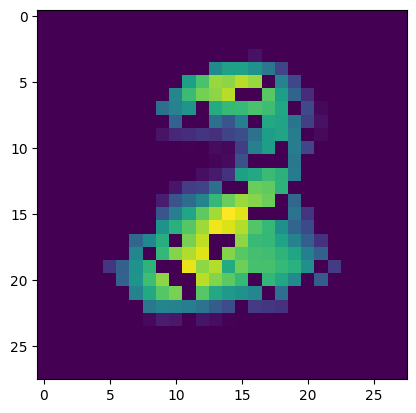

---
tensor(5)


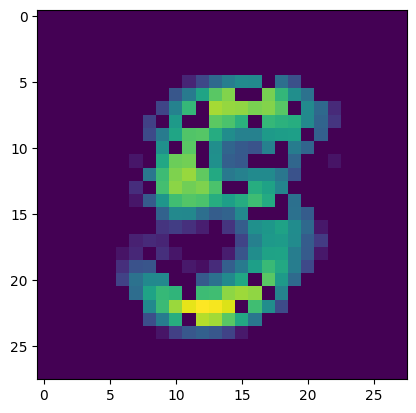

---


In [32]:
for i in range(15):
    print(example_targets[i])
    plt.imshow(samples[i].detach().numpy())
    plt.show()
    print('---')

In [ ]:
####################################################